In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
target = 'Revenue'
def random_forest(train,test):
    x_train=train.drop(columns=[target])
    y_train=train[target]
    x_test = test.drop(target, axis=1)
    y_test = test[target]
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #estimate across the trees.
    feature_importances = pd.DataFrame({
        'feature': x_train.columns,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False).reset_index(drop=True)
    return y_test, y_pred, feature_importances

In [2]:
#Using the training set to try 10 iterations that are balanced with all the features
def load_dataset(csv):
  df = pd.read_csv(csv)
  return df

test_data = pd.read_csv('Test_Set_Files/test_osi.csv') # THE TEST SET 20% of the data

rf_predictions = {}
kfold = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

#USING THE SMOTE_FILES TO TRAIN THE DECISION TREE, Tested using the same Test_osi.csv
for k in kfold:
  file = f'SMOTE_files/SM_all_{k}_train.csv'#the smoted folder
  df = load_dataset(file) #load the dataset now
  if df is not None:
    print(f"File: {file}")
    y_test, y_pred, feature_importances = random_forest(df,test_data)
    #display(df.head())
    # Create a DataFrame to display y_test and y_pred side by side
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    rf_predictions[k] = results_df
    print(rf_predictions[k].head())
    print("feature imp.",feature_importances)
    #display(dt_predictions[k])
  else:
    print(f"File {file} not found or is empty.")

File: SMOTE_files/SM_all_1_train.csv
   Actual  Predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          0
feature imp.                           feature  importance
0                      PageValues    0.462558
1                       ExitRates    0.076165
2         Administrative_Duration    0.058092
3         ProductRelated_Duration    0.052611
4                 SessionDuration    0.048880
5                           Month    0.046579
6                     BounceRates    0.036747
7                  ProductRelated    0.035771
8                TotalPagesViewed    0.034380
9                     TrafficType    0.028445
10                 Administrative    0.026231
11                         Region    0.019559
12               OperatingSystems    0.016443
13         Informational_Duration    0.016405
14                        Browser    0.015366
15                  Informational    0.010435
16                        Weekend    0.006

Avg. True Positive across all folds 272.3
Avg. True Negatives across all folds 1906.8
Avg. False Negatives across all folds 109.7
Avg. False Positive across all folds 177.2
Accuracy: 0.8836577453365775
F1 Score: 0.6549609140108238
Precision: 0.6057842046718577
Recall: 0.71282722513089
True Positive Rate: 0.71282722513089
False Positive Rate: 0.08502879078694818
False Negative Rate: 0.28717277486910997


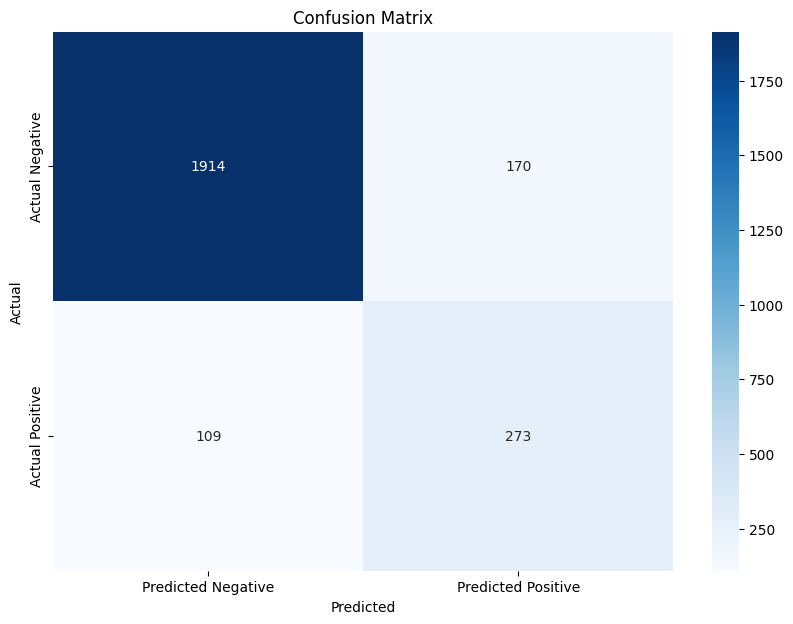

In [4]:
import matplotlib.pyplot as plt
# Calculate the average accuracy of the decision tree predictions across all folds
accuracy = 0
tp = 0
tn = 0
fp = 0
fn = 0

for k, results in rf_predictions.items():
    tp += ((results['Actual'] == 1) & (results['Predicted'] == 1)).sum() # True Positives
    tn += ((results['Actual'] == 0) & (results['Predicted'] == 0)).sum() # True Negatives
    fn += ((results['Actual'] == 1) & (results['Predicted'] == 0)).sum() # False Negatives
    fp += ((results['Actual'] == 0) & (results['Predicted'] == 1)).sum() # False Positives
avgtp = tp / len(rf_predictions)
avgtn = tn / len(rf_predictions)
avgfn = fn / len(rf_predictions)
avgfp = fp / len(rf_predictions)

#print("Average accuracy across all folds:", accuracy)
#print("True Positive Values across Dictionary", tp)
print("Avg. True Positive across all folds",avgtp) #Average True Positives across all folds
#print("True Negative Values across Dictionary", tn)
print("Avg. True Negatives across all folds",avgtn) 
#print("False Negative Values across Dictionary", fn)
print("Avg. False Negatives across all folds",avgfn)
#print("False Positive Values across Dictionary", fp)
print("Avg. False Positive across all folds",avgfp)

accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = (2 * tp) / (2 * tp + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
